In [1]:
# coding=utf-8
import tensorflow as tf
import numpy as np
import os

train_dir = 'D:/PychamProjects/Cats_Dogs/data/train/'

def get_files(file_dir):
    '''
    Args:
        file_dir: file directory
    Returns:
        list of images and labels
    '''
    cats = []
    label_cats = []
    dogs = []
    label_dogs = []
    for file in os.listdir(file_dir):
        # name = file.split(sep='.')
        name = file.split('.')
        if name[0] == 'cat':
            cats.append(file_dir + file)
            label_cats.append(0)  #获取路径下所有猫的图片路径，存放到cats，同时贴上标签0
        else:
            dogs.append(file_dir + file)
            label_dogs.append(1)
    print('There are %d cats\nThere are %d dogs' % (len(cats), len(dogs)))
    #把cat dog合起来组成一个list
    image_list = np.hstack((cats, dogs))
    label_list = np.hstack((label_cats, label_dogs))
    #利用shuuffle打乱顺序
    temp = np.array([image_list, label_list])
    temp = temp.transpose()
    np.random.shuffle(temp)
    # 从打乱的temp中再取出list（img和lab
    image_list = list(temp[:, 0])
    label_list = list(temp[:, 1])
    label_list = [int(i) for i in label_list]

    return image_list, label_list


# 裁剪图片
#将上面生成的List传入get_batch() ，转换类型，产生一个输入队列queue，因为img和lab是分开的，
#所以使用tf.train.slice_input_producer()，然后用tf.read_file()从队列中读取图像
def get_batch(image, label, image_W, image_H, batch_size, capacity):
    '''
    Args:
        image: list type
        label: list type
        image_W: image width
        image_H: image height
        batch_size: batch size
        capacity: the maximum elements in queue
    Returns:
        image_batch: 4D tensor [batch_size, width, height, 3], dtype=tf.float32
        label_batch: 1D tensor [batch_size], dtype=tf.int32
    '''
    # 转换类型
    # 将python.list类型转换成tf能够识别的格式
    image = tf.cast(image, tf.string)
    label = tf.cast(label, tf.int32)

    # make an input queue
    input_queue = tf.train.slice_input_producer([image, label])

    label = input_queue[1]
    image_contents = tf.read_file(input_queue[0]) #read img from a queue
    #将图像解码，不同类型的图像不能混在一起，要么只用jpeg，要么只用png等
    image = tf.image.decode_jpeg(image_contents, channels=3)

    #数据预处理，对图像进行旋转、缩放、裁剪、归一化等操作，让计算出的模型更健壮。
    image = tf.image.resize_image_with_crop_or_pad(image, image_W, image_H)

    # if you want to test the generated batches of images, you might want to comment the following line.
    # 如果想看到正常的图片，请注释掉（标准化）和 （image_batch = tf.cast(image_batch, tf.float32)）
    # 训练时不要注释掉！
    image = tf.image.per_image_standardization(image)
    #生成batch
    image_batch, label_batch = tf.train.batch([image, label],
                                              batch_size=batch_size,
                                              num_threads=64,
                                              capacity=capacity)

    # you can also use shuffle_batch
    #    image_batch, label_batch = tf.train.shuffle_batch([image,label],
    #                                                      batch_size=BATCH_SIZE,
    #                                                      num_threads=64,
    #                                                      capacity=CAPACITY,
    #                                                      min_after_dequeue=CAPACITY-1)
    # 重新排列label，行数为[batch_size]
    label_batch = tf.reshape(label_batch, [batch_size])
    image_batch = tf.cast(image_batch, tf.float32)

    return image_batch, label_batch

'''
import matplotlib.pyplot as plt


BATCH_SIZE = 5  # 批次中的图像数量
CAPACITY = 256  # 队列中最多容纳元素的个数
IMG_W = 208
IMG_H = 208

train_dir = 'D:/PychamProjects/Cats_Dogs/data/train/'

image_list, label_list = get_files(train_dir)
image_batch, label_batch = get_batch(image_list, label_list, IMG_W, IMG_H,
                                     BATCH_SIZE, CAPACITY)

with tf.Session() as sess:
    print("start")
    i = 0
    # 开始输入队列监控
    coord = tf.train.Coordinator()  #
    threads = tf.train.start_queue_runners(coord=coord)  # 启动入队线程

    try:
        while not coord.should_stop() and i < 1:

            img, label = sess.run([image_batch, label_batch])  # 输入list结构

            # just test one batch
            # arange返回一个array对象([ ])
            for j in np.arange(BATCH_SIZE):
                print('label: %d' % label[j])
                plt.imshow(img[j, :, :, :])
                plt.show()
            i += 1
    except tf.errors.OutOfRangeError:
        print('done!')
    finally:
        print('finished')
        coord.request_stop()  # 通知其它线程关闭

'''


'\nimport matplotlib.pyplot as plt\n\n\nBATCH_SIZE = 5  # 批次中的图像数量\nCAPACITY = 256  # 队列中最多容纳元素的个数\nIMG_W = 208\nIMG_H = 208\n\ntrain_dir = \'D:/PychamProjects/Cats_Dogs/data/train/\'\n\nimage_list, label_list = get_files(train_dir)\nimage_batch, label_batch = get_batch(image_list, label_list, IMG_W, IMG_H,\n                                     BATCH_SIZE, CAPACITY)\n\nwith tf.Session() as sess:\n    print("start")\n    i = 0\n    # 开始输入队列监控\n    coord = tf.train.Coordinator()  #\n    threads = tf.train.start_queue_runners(coord=coord)  # 启动入队线程\n\n    try:\n        while not coord.should_stop() and i < 1:\n\n            img, label = sess.run([image_batch, label_batch])  # 输入list结构\n\n            # just test one batch\n            # arange返回一个array对象([ ])\n            for j in np.arange(BATCH_SIZE):\n                print(\'label: %d\' % label[j])\n                plt.imshow(img[j, :, :, :])\n                plt.show()\n            i += 1\n    except tf.errors.OutOfRangeError:\n       

In [2]:
%run model.py


In [3]:
%run training.py

There are 12500 cats
There are 12500 dogs
Step 0, train loss = 0.70, train accuracy = 0.25%
Step 50, train loss = 0.70, train accuracy = 0.44%
Step 100, train loss = 0.69, train accuracy = 0.62%
Step 150, train loss = 0.68, train accuracy = 0.62%
Step 200, train loss = 0.69, train accuracy = 0.50%
Step 250, train loss = 0.70, train accuracy = 0.44%
Step 300, train loss = 0.67, train accuracy = 0.69%
Step 350, train loss = 0.67, train accuracy = 0.69%
Step 400, train loss = 0.73, train accuracy = 0.31%
Step 450, train loss = 0.67, train accuracy = 0.56%
Step 500, train loss = 0.75, train accuracy = 0.38%
Step 550, train loss = 0.72, train accuracy = 0.44%
Step 600, train loss = 0.66, train accuracy = 0.50%
Step 650, train loss = 0.63, train accuracy = 0.62%
Step 700, train loss = 0.49, train accuracy = 0.88%
Step 750, train loss = 0.64, train accuracy = 0.56%
Step 800, train loss = 0.60, train accuracy = 0.75%
Step 850, train loss = 0.58, train accuracy = 0.81%
Step 900, train loss = 0.

In [4]:
%run evaluate.py

There are 12500 cats
There are 12500 dogs


<Figure size 640x480 with 1 Axes>

Reading checkpoints...
INFO:tensorflow:Restoring parameters from D:/PychamProjects/Cats_Dogs/logs/train\model.ckpt-4999
Loading success, global_step is ckpt-4999
This is a cat with possiblity 0.999997


There are 12500 cats
There are 12500 dogs


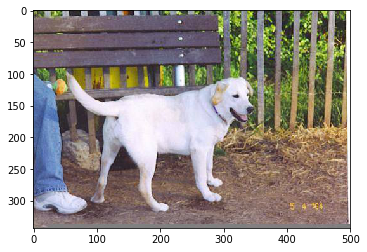

Reading checkpoints...
INFO:tensorflow:Restoring parameters from D:/PychamProjects/Cats_Dogs/logs/train\model.ckpt-4999
Loading success, global_step is ckpt-4999
This is a dog with possiblity 0.998857


In [27]:
%run evaluate.py